# This is a notebook for testing my implementation of LSPI

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import LSPI
import basisFunctions
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
env = gym.make("CartPole-v0")
#env = gym.make("Pendulum-v0")
#env = gym.make("NChain-v0")
#env = gym.make("Acrobot-v1")

#env = gym.make("FetchReach-v0")
env.reset()

array([-0.01957982, -0.03644742,  0.04497918,  0.0275856 ])

# Cartpole experiments

In [3]:
# Notes: for cartpole sampling, use:
# 1000 trials with 6 time steps
#gamma = 0.95
#epsilon = 0.01

In [4]:
env = gym.make("CartPole-v0")

bfs = basisFunctions.get_cartpole_basis_functions_quadratic_v1()

gamma = 0.95
epsilon = 0.01
k = len(bfs) # the number of basis functions will be the size of parameter vector w

w = np.zeros(k)
w_est, w0 = LSPI.LSPI(bfs, gamma, epsilon, w, env, method = "discrete", n_trial_samples=1000, n_timestep_samples=6)
print (w_est)


[ 0.01370798  0.02775896  0.01056482 -0.0093864 ]
20.048854419923487
19.98319084969673
19.993892742427736
[ 1.99911757e+01 -1.35167665e-03  1.22992316e-03  4.32842839e-04]


# MountainCar Experiments

In [ ]:
# Notes

In [14]:
env = gym.make("MountainCarContinuous-v0")

bfs = basisFunctions.get_non_linear_mt_car_basis_functions()

gamma = 0.95
epsilon = 0.01
k = len(bfs) # the number of basis functions will be the size of parameter vector w

w = np.zeros(k)
w_est, w0 = LSPI.LSPI(bfs, gamma, epsilon, w, env, method = "continuous", n_trial_samples=100, n_timestep_samples=20)
print (w_est)

[-0.42409208  0.        ]
-0.4694837318895093
-0.36960976465161366
[-3.70057561e-01  1.66059604e+00 -3.66311850e-02 -3.80966354e-01
 -2.12298309e-01  2.87901243e-01 -1.10509343e-03  1.52690190e-05
 -1.43402956e-01 -2.48400110e-04]


In [15]:
env._max_episode_steps = 200

method = "continuous"
num_steps = []
for i_episode in range(100):
    observation = env.reset()
    print ("--------")
    t = 0
    actions = []
    while True:
        t+=1
        env.render()
        action = LSPI.get_policy_action(env.env.state, w_est, bfs, env, method = method)
        if method == "continuous":
            action = [action[0]]
        observation, reward, done, info = env.step(action)
        #print observation
        if done:
            print ("reward:",reward)
            num_steps.append(t)
            print("Episode finished after {} timesteps".format(t+1))
            break

--------
reward: -0.06833611732281435
Episode finished after 501 timesteps
--------
reward: -0.06431404936924481
Episode finished after 501 timesteps
--------
reward: -0.06584635784503098
Episode finished after 501 timesteps
--------
reward: -0.06610534070890292
Episode finished after 501 timesteps
--------
reward: -0.06878310507397815
Episode finished after 501 timesteps
--------


KeyboardInterrupt: 

128.26


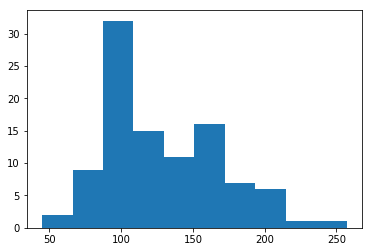

In [92]:
plt.hist(num_steps);
print(np.mean(num_steps))

In [54]:
bfs = basisFunctions.get_cartpole_basis_functions_quadratic_v1()

In [58]:
bfs[0](np.array([1,2,3,2]),3)

27.0

In [66]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])